### Importação das Bibliotecas

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Carregamento do DataSet

In [22]:

df = pd.read_csv('data.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


### Verificação de células nulas no DataSet

In [8]:

df.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

### 1 - Qual é quantidade de usuário por sexo? - Sara

In [9]:

quantidade_por_sexo = df['gender'].value_counts()
print('A quntidade de uauário por sexo é')
print(quantidade_por_sexo)

A quntidade de uauário por sexo é
gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64


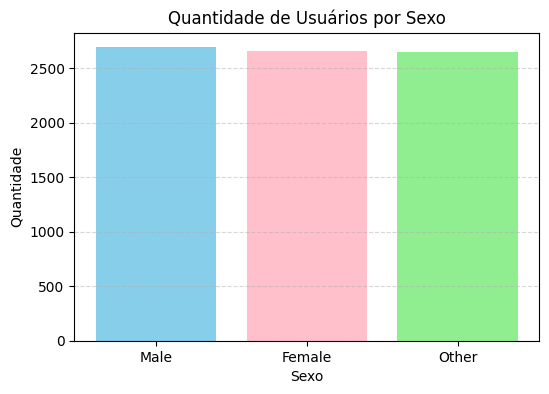

In [ ]:
cores = ['skyblue', 'pink', 'lightgreen']

plt.figure(figsize=(6,4))
plt.bar(quantidade_por_sexo.index, quantidade_por_sexo.values, color=cores)
plt.title('Quantidade de Usuários por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

###  2 - Qual é a média em minutos que os usuários ouvem por dia? - Sara

In [12]:
media_consumo_diario = df['listening_time'].mean()
print(f"A média de consumo por dia em minutos é: {media_consumo_diario:.2f}")

A média de consumo por dia em minutos é: 154.07


### 3 - Qual é a quantidade de usuários por país? - Sara

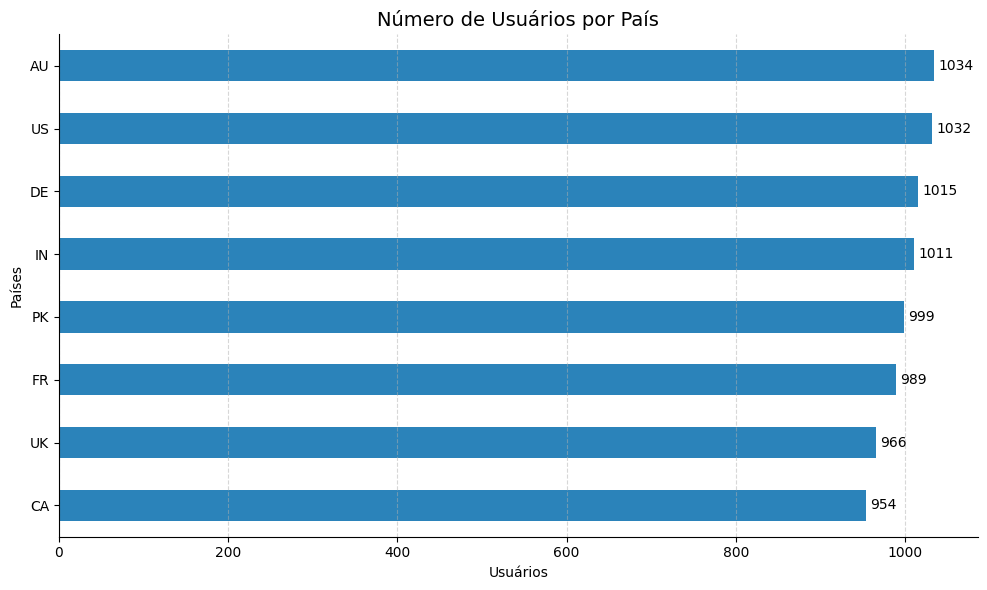

In [34]:

usuarios_por_pais = df.groupby('country')['user_id'].nunique().sort_values(ascending=True)

valor_minimo = usuarios_por_pais.max()

plt.figure(figsize=(10, 6))
eixo = usuarios_por_pais.plot(kind='barh', color = '#2b83ba')

eixo.bar_label(eixo.containers[0], padding=3)

eixo.spines['right'].set_visible(False)
eixo.spines['top'].set_visible(False)

plt.title("Número de Usuários por País", fontsize=14)
plt.xlabel("Usuários")
plt.ylabel("Países")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xlim(0, valor_minimo * 1.05)

plt.show()

### 4 -  Qual é a distribuição de usuários por sexo e país? - Ana

In [84]:
col_map = {}
if 'sexo' in df.columns:
    col_map['sexo'] = 'gender'
if 'país' in df.columns:
    col_map['país'] = 'country'
if 'tipo_de_assinatura' in df.columns:
    col_map['tipo_de_assinatura'] = 'subscription_type'

if col_map:
    df = df.rename(columns=col_map)
    print("Colunas renomeadas:", col_map)
else:
    print("Colunas já em inglês ou mapeamento não necessário.")



Colunas já em inglês ou mapeamento não necessário.


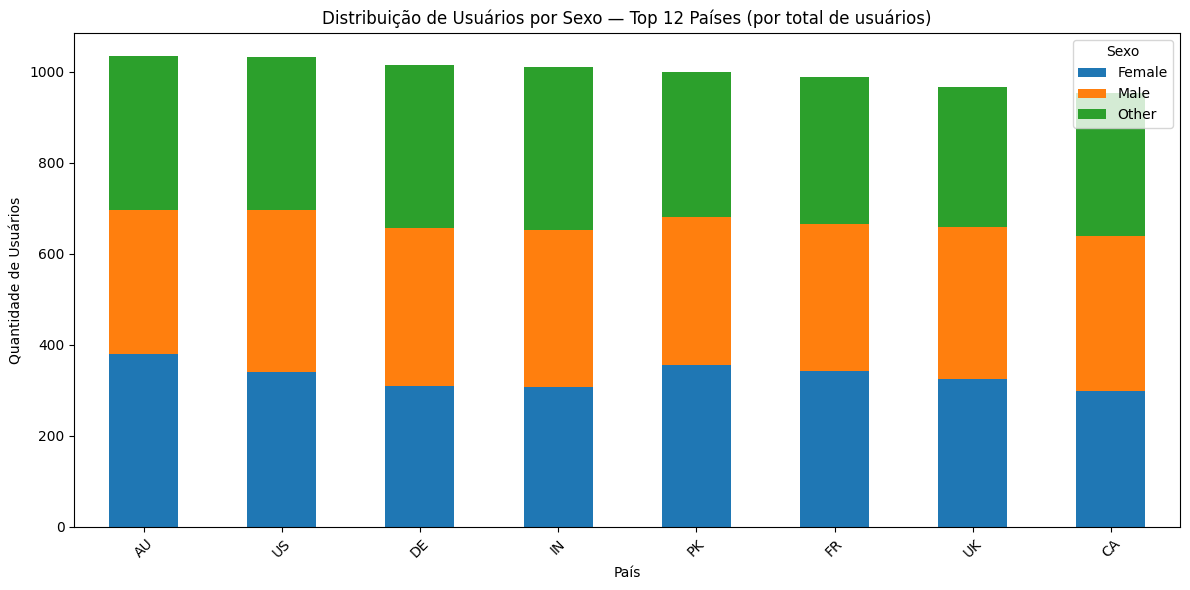


Resumo rápido (Top 12 países):
AU: total=1034 | Male=317 | Female=379 | Other=338
US: total=1032 | Male=356 | Female=341 | Other=335
DE: total=1015 | Male=348 | Female=309 | Other=358
IN: total=1011 | Male=345 | Female=308 | Other=358
PK: total=999 | Male=327 | Female=355 | Other=317
FR: total=989 | Male=324 | Female=342 | Other=323
UK: total=966 | Male=334 | Female=326 | Other=306
CA: total=954 | Male=340 | Female=299 | Other=315


In [ ]:

if not {'country','gender'}.issubset(df.columns):
    raise KeyError("Colunas 'country' e 'gender' não encontradas. Verifique o rename anterior.")

counts = df.groupby(['country','gender']).size().unstack(fill_value=0)

country_totals = counts.sum(axis=1).sort_values(ascending=False)
top_countries = country_totals.head(12).index 
counts_top = counts.loc[top_countries]

ax = counts_top.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribuição de Usuários por Sexo — Top 12 Países (por total de usuários)')
plt.xlabel('País')
plt.ylabel('Quantidade de Usuários')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


print("\nResumo rápido (Top 12 países):")
for c in top_countries:
    total = counts.loc[c].sum()
    male = counts.loc[c].get('Male',0)
    female = counts.loc[c].get('Female',0)
    other = counts.loc[c].get('Other',0)
    print(f"{c}: total={total} | Male={male} | Female={female} | Other={other}")


### 5 -  Qual é a média de músicas "puladas" por dia por usuário? - Ana

A média de músicas puladas por usuário por dia é: 15.04
A mediana de músicas puladas por usuário por dia é: 11.34


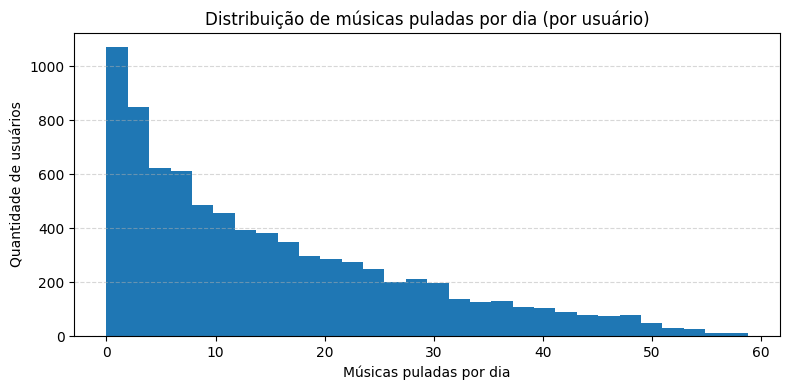

In [86]:
if not {'skip_rate', 'songs_played_per_day'}.issubset(df.columns):
    raise KeyError("Colunas 'skip_rate' e/ou 'songs_played_per_day' não encontradas.")

df['skipped_per_day'] = df['skip_rate'] * df['songs_played_per_day']

media_skipped = df['skipped_per_day'].mean()
mediana_skipped = df['skipped_per_day'].median()

print(f"A média de músicas puladas por usuário por dia é: {media_skipped:.2f}")
print(f"A mediana de músicas puladas por usuário por dia é: {mediana_skipped:.2f}")

plt.figure(figsize=(8,4))
plt.hist(df['skipped_per_day'], bins=30)
plt.title('Distribuição de músicas puladas por dia (por usuário)')
plt.xlabel('Músicas puladas por dia')
plt.ylabel('Quantidade de usuários')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 6 - Qual é a média de músicas tocadas por dia? - Marcio 

In [87]:
media_de_musicas_dia=df['songs_played_per_day'].mean() 

print(f"A média de músicas tocadas por dia é: {media_de_musicas_dia}")

A média de músicas tocadas por dia é: 50.12725


###  7 - Qual tipo de device é mais utilizado? - Marcio

In [ ]:
device_mais_utilizado=df['device_type'].value_counts().idxmax() 

print(f"O device mais utilizado é: {device_mais_utilizado}")


O device mais utilizado é: Desktop


### 8 - Qual é a distribuição do tipo de assinatura por sexo e país? - Marcio

In [89]:
df = df.rename(columns={'gender': 'sexo','country': 'país','subscription_type': 'tipo_de_assinatura'})
distribuicao= df.groupby(['sexo', 'país', 'tipo_de_assinatura']).size().reset_index(name='contagem')
print(f"{distribuicao}")

      sexo país tipo_de_assinatura  contagem
0   Female   AU             Family        96
1   Female   AU               Free        79
2   Female   AU            Premium        99
3   Female   AU            Student       105
4   Female   CA             Family        69
..     ...  ...                ...       ...
91   Other   UK            Student        73
92   Other   US             Family        86
93   Other   US               Free        89
94   Other   US            Premium        88
95   Other   US            Student        72

[96 rows x 4 columns]


### 9 - Qual é a média de idade no geral entre os usuários? - João

In [14]:
media_idade_total = df['age'].mean()
print(f"A média de idade geral de idade dos usuários é: {media_idade_total:.2f}")

A média de idade geral de idade dos usuários é: 37.66


### 10 - Qual é a média de idade por sexo? - João

In [91]:
media_idade_sexo = df.groupby('sexo')['age'].mean()
print("A media de idade por sexo é: ")
print(media_idade_sexo)

A media de idade por sexo é: 
sexo
Female    37.898834
Male      37.500557
Other     37.588679
Name: age, dtype: float64


### 11 - Qual é a relação entre a variável *age* e *device_type*? - João

Média e desvio padrão da idade: 
                  mean        std
device_type                      
Desktop      37.896688  12.856194
Mobile       37.687957  12.766210
Web          37.388105  12.590192


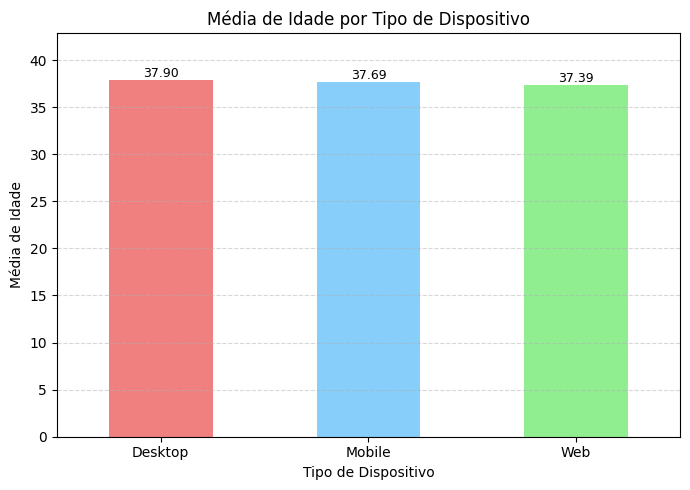

In [92]:
relacao_age_device = df.groupby('device_type')['age'].agg(['mean', 'std'])
print("Média e desvio padrão da idade: ")
print(relacao_age_device)

media_age_device = relacao_age_device['mean']

plt.figure(figsize=(7,5))

bar_plot = media_age_device.plot(kind='bar', color=['lightcoral', 'lightskyblue', 'lightgreen'])

media_age_device.plot(kind='bar', color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title("Média de Idade por Tipo de Dispositivo")
plt.xlabel("Tipo de Dispositivo")

plt.ylim(0, media_age_device.max() + 5)

for i, v in enumerate(media_age_device.values):
    bar_plot.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

plt.ylabel('Média de Idade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [23]:
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


## Questão principal: Prever se um usuário do Spotify irá cancelar a assinatura ou permanecer ativo.

### Convertendo Variáveis Numéricas com One-Hot Enconding

In [28]:
df_processado = pd.get_dummies(df, columns=['gender', 'country', 'subscription_type', 'device_type'], drop_first=True)


In [29]:
X = df_processado.drop('is_churned', axis=1)
y = df_processado['is_churned']

### Dividindo o DataSet entre um conjunto de treinamento e um conjunto de teste

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Usando regressão logística para prever se o usuário irá cancelar a assinatura ou não. (True or False)

In [ ]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

### Resultados

In [ ]:

y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia: {:.2f}".format(accuracy))

print("Precisão: {:.2f}".format(precision))

print("Recall: {:.2f}".format(recall))

print("F1: {:.2f}".format(f1))

Acurácia: 0.75
Precisão: 0.00
Recall: 0.00
F1: 0.00


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
